<a href="https://colab.research.google.com/github/Thangivasu/fmml_lab1/blob/main/thangivasu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
df=pd.read_excel('/content/AirQualityUCI.xlsx')


In [85]:
print(df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [86]:
print(df.shape)

(9357, 15)


In [87]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [88]:
print (df.info)

<bound method DataFrame.info of            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    

In [89]:
X=df['RH'].values
Y=df['AH'].values

In [93]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

In [94]:
0
m=len(X)
numer=0
denom=0
for i in range(m):
   numer+=(X[i]-mean_x)*(Y[i]-mean_y)
   denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
print(b1,b0)

0.7184106787758813 -35.203051629662625


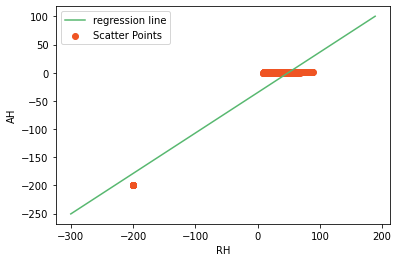

In [96]:
max_x=np.max(X)+ 100
min_x=np.min(X)-100
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x
plt.plot(x,y,color="#58b870",label="regression line")
plt.scatter(X,Y,c="#ef5423",label="Scatter Points")
plt.xlabel("RH")
plt.ylabel("AH")
plt.legend()
plt.show()

In [97]:
ss_t=0 
ss_r=0

for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t +=(Y[i]-mean_y)**2
    ss_r +=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.891130648402183


In [98]:
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

X=X.reshape((m,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)

print(r2_score)

0.8911306484021855


RANDOM FOREST

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
from google.colab import drive

In [40]:
df=pd.read_csv('/content/day.csv')


In [42]:
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [44]:
df.shape

(731, 16)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [47]:
df.dropna(inplace=True)

In [48]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [50]:
df.season.unique()

array([1, 2, 3, 4])

In [51]:
pd.get_dummies(df['season'].head())

,1
0,1
1,1
2,1
3,1
4,1


In [52]:
season=pd.get_dummies(df['season'],drop_first=True)
season.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [53]:
df.holiday.unique()

array([0, 1])

In [54]:
pd.get_dummies(df['holiday']).head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [55]:
holiday=pd.get_dummies(df['holiday'],drop_first=True)
holiday.head(5)

,1
0,0
1,0
2,0
3,0
4,0


In [56]:
new_data=pd.concat([df,holiday,season],axis=1)

In [57]:
new_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,1,2,3,4
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,0


In [58]:
new_data.drop(['season','holiday'],axis=1,inplace=True)

In [59]:
new_data.head()

,instant,dteday,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,1,2,3,4
0,1,2011-01-01,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,0
1,2,2011-01-02,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,0
2,3,2011-01-03,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,0
3,4,2011-01-04,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,0
4,5,2011-01-05,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,0


In [63]:
Y=new_data.dteday

In [64]:
Y.head()

0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: dteday, dtype: object

In [65]:
Y.unique()

array(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
       '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
       '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
       '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
       '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20',
       '2011-01-21', '2011-01-22', '2011-01-23', '2011-01-24',
       '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28',
       '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
       '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
       '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09',
       '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13',
       '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17',
       '2011-02-18', '2011-02-19', '2011-02-20', '2011-02-21',
       '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25',
       '2011-02-26', '2011-02-27', '2011-02-28', '2011-03-01',
       '2011-03-02', '2011-03-03', '2011-03-04', '2011-

In [66]:
Y=Y.map({'2011-01-01':0,'2011-01-02':1,'2011-01-03':2})  #hot encoding
Y.head()

0    0.0
1    1.0
2    2.0
3    NaN
4    NaN
Name: dteday, dtype: float64

In [68]:
new_data.drop('dteday',inplace=True,axis=1)

In [69]:
new_data.head()

,instant,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,1,2,3,4
0,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,0
1,2,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,0
2,3,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,0
3,4,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,0
4,5,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,0


In [70]:
X=new_data

In [79]:
from sklearn.model_selection import train_test__split


ImportError: ignored

In [81]:
print('x_train',X_train.shape)
print('x_test',X_test.shape)
print('Y_train',y_train.shape)
print('y_test',y_test.shape)

NameError: ignored